In [1]:
# %matplotlib
# %matplotlib inline
import numpy
import matplotlib.pyplot as plt
import time

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
print(sys.path)

['', 'C:\\Users\\seanm\\Anaconda3\\python35.zip', 'C:\\Users\\seanm\\Anaconda3\\DLLs', 'C:\\Users\\seanm\\Anaconda3\\lib', 'C:\\Users\\seanm\\Anaconda3', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\seanm\\.ipython', 'C:\\Users\\seanm\\OneDrive\\Documents\\Research\\TauHybridSolver\\GillesPy2']


In [3]:
import math
import gillespy2
from gillespy2.basic_tau_hybrid_solver import BasicTauHybridSolver
from gillespy2.basic_ssa_solver import BasicSSASolver
from gillespy2.basic_tau_leaping_solver import BasicTauLeapingSolver

Unable to use Cython optimized SSA:
Error:No module named 'cython_ssa_solver'


In [4]:
class SimpleHybridModel(gillespy2.Model):
     def __init__(self, parameter_values=None, init_v=1):
            #initialize Model
            gillespy2.Model.__init__(self, name="Simple_Hybrid_Model")

            
            #Species
            A = gillespy2.Species(name='A', initial_value=0)
            V = gillespy2.Species(name='V', initial_value=init_v)

            self.add_species([A, V])
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 20.0)
            rate2 = gillespy2.Parameter(name='rate2', expression= 10.0)
#             rate_rule1 = gillespy2.RateRule(V, "cos(t)")
            self.add_parameter([rate1, rate2])
#             self.add_rate_rule(rate_rule1)
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={}, products={A:1},
                   propensity_function="rate1 * V")
            
            r2 = gillespy2.Reaction(name="r2",reactants={A:1}, products={},
                    rate=rate2)
            
            self.add_reaction([r1,r2])
            self.timespan(numpy.linspace(0,100, 101))

In [5]:
model = SimpleHybridModel()

In [6]:
%time results1 = model.run(solver=BasicSSASolver(), show_labels=True)
%time results2 = model.run(solver=BasicTauLeapingSolver(), show_labels=True)
%time results3 = model.run(solver=BasicTauHybridSolver(), show_labels=True)

Wall time: 145 ms
Wall time: 157 ms
Wall time: 579 ms


In [7]:
v_range = range(1, 15)
def run_test(solver, v_range):
    run_data = []
    for n in v_range:
        model = SimpleHybridModel(init_v=n)
        time_start = time.perf_counter()
        model.run(solver=solver, show_labels=True)
        time_end = time.perf_counter()
        run_data.append(time_end-time_start)
    return run_data

In [8]:
timing_data = {'basic':[], 'tau':[], 'hybrid_tau':[]}
%time timing_data['basic'] = run_test(BasicSSASolver(), v_range)
%time timing_data['tau'] = run_test(BasicTauLeapingSolver(), v_range)
%time timing_data['hybrid_tau'] = run_test(BasicTauHybridSolver(), v_range)
print(timing_data)

Wall time: 10.3 s
Wall time: 9.74 s
Wall time: 29.7 s
{'tau': [0.26786599617536666, 0.18426123219416368, 0.2668117046413574, 0.6144347913646229, 0.4404353016570859, 0.5516218852319827, 0.6123496749232213, 0.7022712281237702, 0.783657329224825, 0.8914408252743264, 0.9506351775826332, 1.0720378503887353, 1.1530510454595486, 1.2077479121102286], 'hybrid_tau': [0.5495444487774748, 0.7413401747794346, 0.9205846688688339, 1.1021749722880472, 1.4222175194154332, 1.700319231455179, 2.1107624776320364, 2.2035047193519475, 2.392425996926299, 2.6239904017230486, 2.91440355941792, 3.234923119064547, 3.481335071854815, 4.212254357752556], 'basic': [0.10374467627575257, 0.19059082139166494, 0.32007326707495753, 0.38854205688822296, 0.4731772191108794, 0.5770102152358993, 0.6833063538238231, 0.7628496847365382, 0.857546483120669, 0.948901207208606, 1.0399128918819978, 1.2080286582977564, 1.2913253694713678, 1.3785960471960799]}


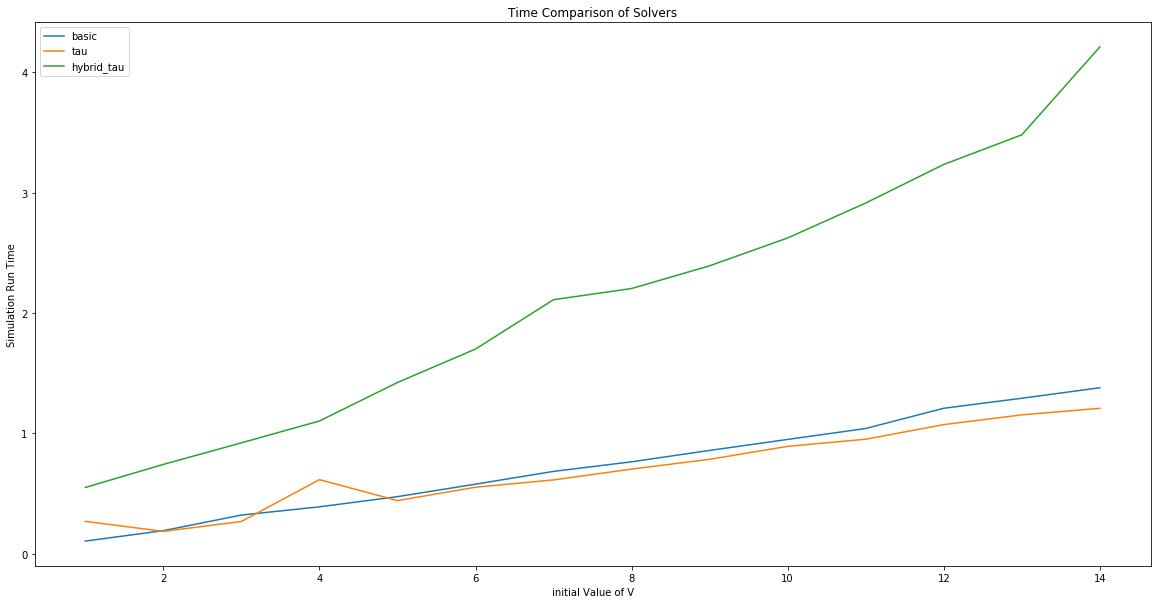

In [9]:
plt.figure(figsize=(20,10))
plt.title("Time Comparison of Solvers")
plt.xlabel("initial Value of V")
plt.ylabel("Simulation Run Time")
plt.plot(v_range, timing_data['basic'], label='basic')
plt.plot(v_range, timing_data['tau'], label='tau')
plt.plot(v_range, timing_data['hybrid_tau'], label='hybrid_tau')
plt.legend(loc='best')
plt.savefig("TimeComparisonOfSolvers.pdf")